# Exercise 4.10 (Part 1)

## Table of content

1. Importing Libraries
2. Defining path
3. Importing Data set
4. PII information in data
5. Regional segmentation of data
6. Defining Activity_flag, based on max orders by users
7. Excluding customers with less than 5 orders
8. Exporting the new data frame with Active users only.

## Importing libraries 

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Defining path

path = r'/Users/tanu/Desktop/Instacart Basket Analysis/02 Data'

In [6]:
# Importing Data frame

df_merge = pd.read_pickle(os.path.join(path,'Prepared data','ords_prods_cstmr_merged.pkl'))

In [10]:
df_merge.shape

(32404859, 32)

In [12]:
df_merge.head()

,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,days_btwn_orders,order_frequency,First Name,Last Name,Gender,State,Age,No. of Dependants,Marital status,income
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
1,2539329,1,1,2,8,7.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
2,2539329,1,1,2,8,7.0,12427,3,0,Original Beef Jerky,...,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
3,2539329,1,1,2,8,7.0,26088,4,0,Aged White Cheddar Popcorn,...,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
4,2539329,1,1,2,8,7.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423


In [41]:
df_merge.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Match', 'price_range_loc', 'busiest_day',
       'Busiest_days', 'Busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spending', 'spending_label', 'days_btwn_orders',
       'order_frequency', 'First Name', 'Last Name', 'Gender', 'State', 'Age',
       'No. of Dependants', 'Marital status', 'income', 'Region'],
      dtype='object')

## PII information in data

##### Observations: 
##### PII data: customers First Name & Last name
##### Sensitive data : Age, Marital status, No. of dependants, Income

## Create a regional segmentation of the data


In [34]:
Northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
Midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana',]
West = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [36]:
df_merge.loc[df_merge['State'].isin(Northeast),'Region'] = 'Northeast'
df_merge.loc[df_merge['State'].isin(Midwest),'Region'] = 'Midwest'
df_merge.loc[df_merge['State'].isin(South),'Region'] = 'South'
df_merge.loc[df_merge['State'].isin(West),'Region'] = 'West'

In [38]:
df_merge['Region'].value_counts(dropna = False)

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

all rows add up to 32404859 , mean all rows are called/divided in perfect region


In [43]:
# Creating crosstab for 'region' & 'Spending_label'

crosstab = pd.crosstab(df_merge['Region'],df_merge['spending_label'], dropna = False)

In [47]:
# saving crosstab to clipboard

crosstab.to_clipboard()

In [49]:
crosstab

spending_label,High spender,Low spender
Region,,
Midwest,29294,7568031
Northeast,18642,5704094
South,40739,10751146
West,31286,8261627


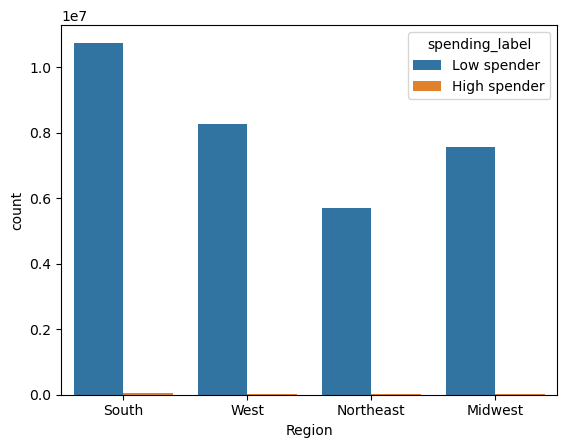

In [59]:
clusterbar = sns.countplot(data = df_merge, x= 'Region', hue ='spending_label')

#### Observation: 
Majority of the customers are low spender irrespective of the region.


## Exclude cutsomers with less than 5 orders

In [63]:
# Frequency of orders for different customer

df_merge['max_order'].value_counts(dropna=False)

max_order
99    1171333
8      811843
6      811396
9      810213
7      803979
       ...   
97      44949
98      44587
96      40453
2           6
1           5
Name: count, Length: 99, dtype: int64

In [65]:
# Defining 'activity_flag'

df_merge.loc[df_merge['max_order'] <5, 'activity_flag'] ='Low activity'
df_merge.loc[df_merge['max_order'] >= 5, 'activity_flag'] = 'normal activity'

In [69]:
df_merge['activity_flag'].value_counts(dropna=False)

activity_flag
normal activity    30964564
Low activity        1440295
Name: count, dtype: int64

In [75]:
# Creating new dataframe without low activity customers

df_active = df_merge[df_merge['activity_flag'] != 'Low activity']

In [77]:
df_active.shape

(30964564, 34)

In [79]:
df_merge.shape

(32404859, 34)

##### Checking for acuracy of new data frame 
32404859-30964564 = 1440295 = low activity customer accounts

## Exporting the new data set with active user accounts only

In [82]:
# Exporting the New Active customer dataframe

df_active.to_pickle(os.path.join(path,'Prepared data','active_customer.pkl'))